# WeatherPy
----

#### Observations and Trends
1. There is a strong correlation between latitde and temperature in both Northern and Southern Hemispheres. Temperature at the highest when near the equator (0) and decreasing as it as the latitude increases. This is shown in scatterplot1.png, LinRegress1 and LinRegress2. 

2. There is a weak correlation between both Hemispheres and Wind speed. 

3. There is a weak correlation between both Hemispheres and Humidity (%).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
import os
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy
from config import api_key

temp_units = "imperial"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List
lat_lngs = []
cities = []

#random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# --- fahrenheit units ---
units = "imperial"

# --- build partial query url for API call for fahrenheit data ---
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# --- create empty lists to hold required data ---
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# --- initialize count variables for counting city and set ---
item = 1
batch = 1

# --- print initial header before displaying for loop  data ---
print("Beginning Data Retrieval")
print("----------------------------")

# --- for loop go through the list of cities and perform a request for data on each city ---
for city in cities:
    
    # --- build query url with city name ---
    query_url = base_url + city
    
    # --- get the response as json ---
    data = requests.get(query_url).json()
    
    # --- retrieve required data into lists using exception handling ---
    try:
        print(f"Processing Record {item} of Set {batch} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        # --- increase item count by 1 ---
        item += 1
        
        # --- if statement to limit API calls to 50 using time.sleep (openweathermap API limits calls to 60/minute) ---
        if item > 50:
            batch += 1
            item = 1
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")


print("----------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | puerto escondido
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | dieppe
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | bentiu
Processing Record 12 of Set 1 | yar-sale
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | sulangan
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | san carlos de bariloche
Processing Record 17 of Set 1 | rio gallegos
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | taolanaro
City 'taolanaro' not found. Skipping...
Processing Record 20 of Set 1 | bambous virieux
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# --- create a dataframe with retrieved data ---
cities_temps_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": date,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (F)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                })

# --- convert unix timestamp under date column to date,time using pd.to_datetime ---
cities_temps_df["Date"] = pd.to_datetime(cities_temps_df["Date"], unit = "s")

# --- save the dataframe to .csv file ---
cities_temps_df.to_csv("cities.csv", index=True, index_label="City ID", header=True)

# --- display the dataframe ---
cities_temps_df

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Puerto Escondido,MX,2020-10-16 11:04:34,15.85,-97.07,78.01,75,26,4.52
1,Kavaratti,IN,2020-10-16 11:05:12,10.57,72.64,81.70,77,12,18.68
2,Saskylakh,RU,2020-10-16 11:05:12,71.92,114.08,10.94,95,88,4.50
3,Arrondissement de Dieppe,FR,2020-10-16 11:05:12,49.75,1.17,55.00,71,90,9.17
4,Puerto Ayora,EC,2020-10-16 11:05:12,-0.74,-90.35,70.00,90,94,3.00
...,...,...,...,...,...,...,...,...,...
578,Itarema,BR,2020-10-16 11:06:52,-2.92,-39.92,83.79,63,35,17.16
579,Gachsaran,IR,2020-10-16 11:02:32,30.36,50.80,89.60,11,0,6.93
580,Natchitoches,US,2020-10-16 11:06:53,31.77,-93.13,57.20,76,90,11.41
581,Tacoronte,ES,2020-10-16 11:03:08,28.48,-16.41,71.01,82,75,8.05


In [37]:
cities_temps_df.count()

City                583
Country             583
Date                583
Lat                 583
Lng                 583
Max Temp (F)        583
Humidity (%)        583
Cloudiness (%)      583
Wind Speed (mph)    583
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
#  Get the indices of cities with humidity over 100%.
humidity_over_100 = cities_temps_df.loc[cities_temps_df["Humidity (%)"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities that have a humidity greater than 100%")
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = cities_temps_df["Lat"]
    temperatures = cities_temps_df["Max Temp (F)"]
    humidity = cities_temps_df["Humidity (%)"]
    cloudiness = cities_temps_df["Cloudiness (%)"]
    windspeed = cities_temps_df["Wind Speed (mph)"]
    
else:
    #  Get the indices of cities with humidity over 100%
    Humidityover100Index = humidity_over_100.index
    
    # Create a clean DataFrame
    clean_city_data = cities_temps_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp (F)"]
    humidity = clean_city_data["Humidity (%)"]
    cloudiness = clean_city_data["Cloudiness (%)"]
    windspeed = clean_city_data["Wind Speed (mph)"]

    # put into data frame
    clean_city_data.head()

There are no cities that have a humidity greater than 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

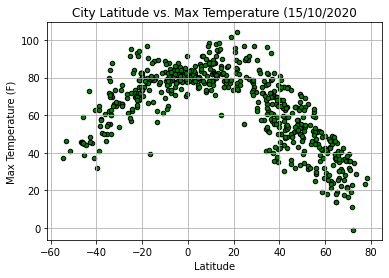

Each marker represents a randomly generated city. This scatter graph shows a rise in temeprature as you get closer the equator (Latitude=0)


In [62]:
plt.scatter(cities_temps_df["Lat"],cities_temps_df["Max Temp (F)"],edgecolors="black",facecolors="green", s=20)
plt.title("City Latitude vs. Max Temperature (15/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('scatterplot1')
plt.show()
print("Each marker represents a randomly generated city. This scatter graph shows a rise in temeprature as you get closer the equator (Latitude=0)")

## Latitude vs. Humidity Plot

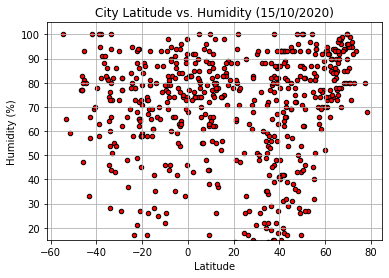

Each marker represents a randomly generated city. This scatter graph shows no correlation between humidity and latitude


In [63]:
plt.scatter(cities_temps_df["Lat"],cities_temps_df["Humidity (%)"],edgecolors="black",facecolors="red", s=20)
plt.title("City Latitude vs. Humidity (15/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid()
plt.savefig('scatterplot2')
plt.show()
print("Each marker represents a randomly generated city. This scatter graph shows no correlation between humidity and latitude")

## Latitude vs. Cloudiness Plot

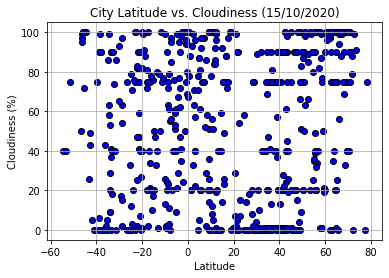

Each marker represents a randomly generated city. This graph shows there is no strong correlation between latitude and clouds. However you can see that there are less clouds at the minimum and maximum latitude.


In [64]:
plt.scatter(cities_temps_df["Lat"],cities_temps_df["Cloudiness (%)"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (15/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('scatterplot3')
plt.show()
print("Each marker represents a randomly generated city. This graph shows there is no strong correlation between latitude and clouds. However you can see that there are less clouds at the minimum and maximum latitude.")

## Latitude vs. Wind Speed Plot

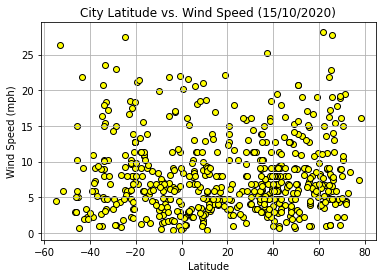

Each marker represents a randomly generated city. This scatterplot shows no correlation between Latitude and Wind Speed


In [65]:
plt.scatter(cities_temps_df["Lat"],cities_temps_df["Wind Speed (mph)"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Wind Speed (15/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('scatterplot4')
plt.show()
print("Each marker represents a randomly generated city. This scatterplot shows no correlation between Latitude and Wind Speed")

## Linear Regression

In [52]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] >= 0]
southern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] < 0]

 #Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r value is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is : -0.85
This scatter graph shows a strong negative correlation between Latitiude and Max Temperature for Northern Hemisphere


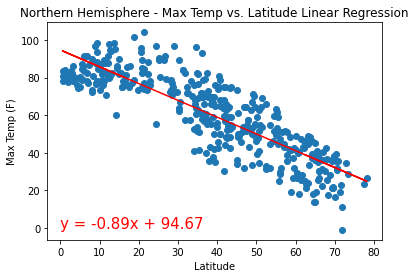

In [66]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp (F)"])

annotate(equation, 0, 0)


plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("LinRegress1")
print("This scatter graph shows a strong negative correlation between Latitiude and Max Temperature for Northern Hemisphere")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is : 0.71
This scatter graph shows a strong positive correlation between latitiude and Max Temperature for Southern Hemisphere


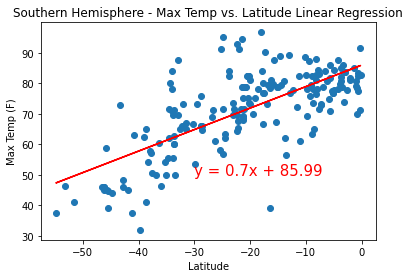

In [67]:
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp (F)"])

annotate(equation, -30, 50)


plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("LinRegress2")
print("This scatter graph shows a strong positive correlation between latitiude and Max Temperature for Southern Hemisphere")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is : 0.19
This scatter graph shows a weak positive correlation between latitiude and humidity for Northern Hemisphere


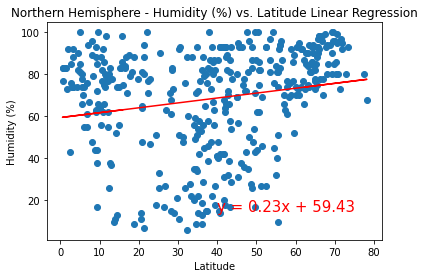

In [68]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity (%)"])
annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LinRegress3")
print("This scatter graph shows a weak positive correlation between latitiude and humidity for Northern Hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is : -0.02
This scatter graph shows a weak correlation between latitiude and humidity for Southern Hemisphere


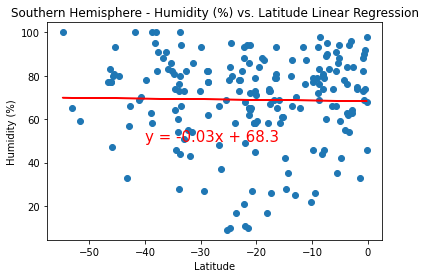

In [69]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity (%)"])

annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LinRegress4")
print("This scatter graph shows a weak correlation between latitiude and humidity for Southern Hemisphere")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is : 0.2
This scatter graph shows a weak correlation between latitiude and cloudiness for Northern Hemisphere


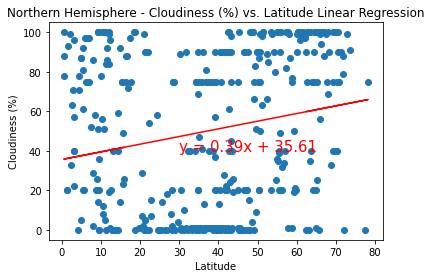

In [70]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness (%)"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("LinRegress5")
print("This scatter graph shows a weak correlation between latitiude and cloudiness for Northern Hemisphere")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is : 0.1
This scatter graph shows a weak but positive correlation between latitiude and cloudiness for Southern Hemisphere


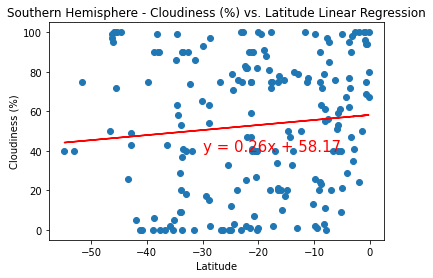

In [71]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness (%)"])

annotate(equation, -30, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("LinRegress6")
print("This scatter graph shows a weak but positive correlation between latitiude and cloudiness for Southern Hemisphere")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is : 0.11
This graph shows a weak positive correlation between latitiude and wind speed for Northern Hemisphere


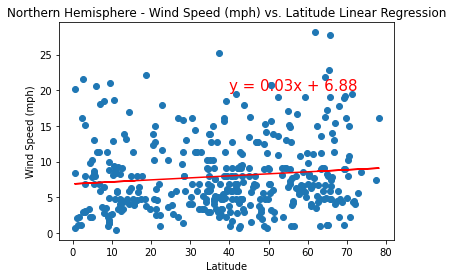

In [72]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed (mph)"])

annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("LinRegress7")
print("This graph shows a weak positive correlation between latitiude and wind speed for Northern Hemisphere")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is : -0.11
This graph shows a week negative correlation between latitiude and wind speed for Southern Hemisphere


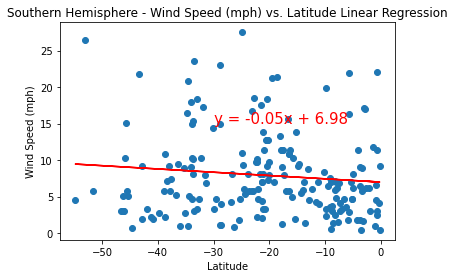

In [73]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed (mph)"])

annotate(equation, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("LinRegress8")

print("This graph shows a week negative correlation between latitiude and wind speed for Southern Hemisphere")